In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [4]:
iris_data = load_iris()

In [5]:
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

In [6]:
iris_df['target'].unique()

array([0, 1, 2])

In [7]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
species = ['setosa', 'versicolor', 'virginica']
y_species = [species[label] for label in iris_data.target]

In [11]:
iris_df['species'] = y_species

In [13]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
del iris_df['target']

In [19]:
X = iris_df.drop(columns = 'species')
y = iris_df['species']

In [20]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(X)

In [22]:
pca = PCA(n_components =0.99, random_state =42)
pca.fit(df_scaled)

PCA(n_components=0.99, random_state=42)

In [24]:
df_transformed = pca.transform(df_scaled)

In [25]:
df_transformed[:10]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557]])

In [27]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

# Using Kmeans on the transformed data using PCA

In [29]:
kmeans = KMeans(n_clusters = 3, n_init =15, random_state = 42)
kmeans.fit(df_transformed)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=42)

In [30]:
kmeans.inertia_

136.81551260694062

In [31]:
labels = kmeans.labels_

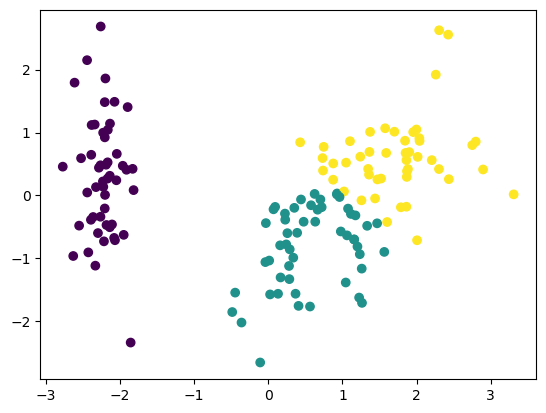

In [34]:
plt.scatter(df_transformed[:,0], df_transformed[:,1], c= labels)

# Kmeans on original data

In [35]:
kmeans = KMeans(n_clusters = 3, n_init =15, random_state = 42)
kmeans.fit(df_scaled)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=42)

In [36]:
kmeans.inertia_

139.8204963597498

In [38]:
labels2 = kmeans.labels_

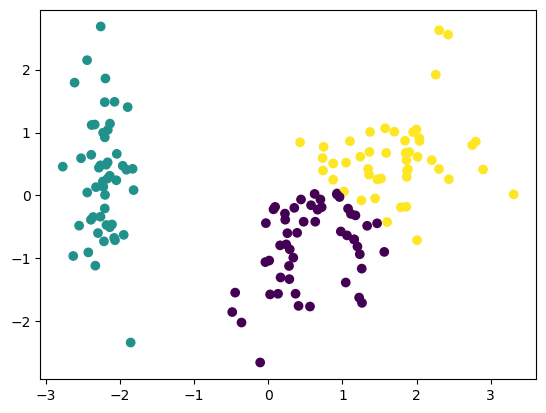

In [41]:
plt.scatter(df_transformed[:,0], df_transformed[:,1], c= labels2)

In [40]:
all(labels== labels2)

True

# Pipelines

In [55]:


# Creating the pipeline
pipeline = make_pipeline(
    StandardScaler(),  # StandardScaler for standardizing features
    PCA(n_components=0.99, random_state=42),  # PCA with 99% variance explained
    KMeans(n_clusters=3, n_init=15, random_state=42)  # KMeans clustering with k=3
)

In [56]:
pipeline.fit(X)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.99, random_state=42)),
                ('kmeans', KMeans(n_clusters=3, n_init=15, random_state=42))])

In [57]:
labels3= pipeline.named_steps['kmeans'].labels_

In [58]:
all(labels3== labels2)

False